In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tongpython/cat-and-dog")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'cat-and-dog' dataset.
Path to dataset files: /kaggle/input/cat-and-dog


In [8]:
import os

data_path = "/kaggle/input/cat-and-dog"
print(os.listdir(data_path))


['test_set', 'training_set']


In [9]:
print(os.listdir(os.path.join(data_path, "training_set")))


['training_set']


In [10]:
train_dir = os.path.join(data_path, "training_set", "training_set")
test_dir  = os.path.join(data_path, "test_set", "test_set")

In [11]:
# /kaggle/input/cat-and-dog/
# ├── training_set/
# │   └── training_set/
# │       ├── cats/
# │       └── dogs/
# └── test_set/
#     └── test_set/
#         ├── cats/
#         └── dogs/


In [12]:
print("Training subfolders:", os.listdir(train_dir))
print("Test subfolders:", os.listdir(test_dir))

Training subfolders: ['dogs', 'cats']
Test subfolders: ['dogs', 'cats']


In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [14]:
#build generators
train_dataset= keras.utils.image_dataset_from_directory(
    directory= train_dir,
    labels="inferred",
    label_mode="int",
    image_size=(256,256),
    batch_size=32
);

validation_dataset= keras.utils.image_dataset_from_directory(
    directory= test_dir,
    labels="inferred",
    label_mode="int",
    image_size=(256,256),
    batch_size=32
);

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [15]:
#we need to normalize the images  so that 0-1 ko biccha ma lie garxa
def normalize(image,label):
  image= tf.cast(image/255,tf.float32)
  return image,label

train_dataset  = train_dataset.map(normalize)
validation_dataset = validation_dataset.map(normalize)

In [16]:
#build the cnn model
model =Sequential([
    Conv2D(32,(3,3),padding="valid",activation="relu",input_shape=(256,256,3)),
    MaxPool2D(pool_size=(2,2),strides=2),
    Conv2D(64,(3,3),padding="valid",activation="relu"),
    MaxPool2D(pool_size=(2,2),strides=2),
    Conv2D(128,(3,3),padding="valid",activation="relu"),
    MaxPool2D(pool_size=(2,2),strides=2),
    Flatten(),
    Dense(128,activation="relu"),
    Dense(64,activation="relu"),
    Dense(1,activation="sigmoid"),
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [23]:
history=model.fit(train_dataset,epochs=10,validation_data=validation_dataset)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 25s 88ms/step - accuracy: 0.9887 - loss: 0.0333 - val_accuracy: 0.7385 - val_loss: 1.7508
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.9920 - loss: 0.0271 - val_accuracy: 0.7316 - val_loss: 1.6151
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.9903 - loss: 0.0270 - val_accuracy: 0.7425 - val_loss: 1.5951
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.9950 - loss: 0.0158 - val_accuracy: 0.7395 - val_loss: 1.8241
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.9957 - loss: 0.0100 - val_accuracy: 0.7355 - val_loss: 2.0137
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - accuracy: 0.9944 - loss: 0.0227 - val_accuracy: 0.7321 - val_loss: 2.0841
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.9935 - loss: 0.0185 - val_accuracy: 0.7207 - val_loss: 2.1334
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.9941 - loss: 0.0230 - 

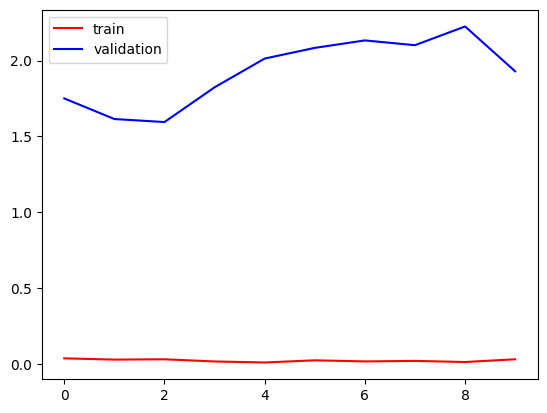

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color="red",label="train")
plt.plot(history.history['val_loss'],color="blue",label="validation")
plt.legend()
plt.show()

In [28]:
"""
TRAINING INTERPRETATION:

Classic overfitting pattern observed:

Training loss → 0: Model perfectly fits training data
Validation loss increases after epoch 2: Model fails to generalize
The divergence indicates the model is memorizing training examples rather than
learning underlying patterns. Peak performance on unseen data occurs around epoch 2.
"""



'\nTRAINING INTERPRETATION:\n\nClassic overfitting pattern observed:\n\nTraining loss → 0: Model perfectly fits training data\nValidation loss increases after epoch 2: Model fails to generalize\nThe divergence indicates the model is memorizing training examples rather than\nlearning underlying patterns. Peak performance on unseen data occurs around epoch 2.\n'

In [29]:
# to reduce overfitting we can do some techs such as
#adding more data
#l1/l2 regularizer
#dropouts/'
#batch norm
#reduce complextity

In [37]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.regularizers import l2

model2 = Sequential([
    Conv2D(32, (3,3), padding="valid", activation="relu", input_shape=(256,256,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=2),
    Dropout(0.1),

    Conv2D(64, (3,3), padding="valid", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=2),
    Dropout(0.15),

    Conv2D(128, (3,3), padding="valid", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=2),
    Dropout(0.15),

    Flatten(),
    Dense(128, activation="relu", kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(64, activation="relu", kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

early_stop= EarlyStopping(
    monitor="val_loss",
    patience=5, #if val_loss doesn’t improve for 5 consecutive epochs, training stops.
    restore_best_weights=True #after stopping, restores the model weights from the epoch with the best validation loss.
)

#purpose of ReduceLROnPlateau
#Dynamically reduce the learning rate when the model hits a plateau (i.e., stops improving).
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5, #multiplies the current learning rate by 0.5 (halves it) when triggered.
    patience=3, #f val_loss doesn’t improve for 3 epochs, reduce the learning rate.
    min_lr=1e-7 #learning rate won’t go below this value.
)




In [39]:
model2.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [40]:
history2= model2.fit(train_dataset,epochs=10,validation_data=validation_dataset,callbacks=[early_stop,reduce_lr])

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 128ms/step - accuracy: 0.5401 - loss: 12.2440 - val_accuracy: 0.4899 - val_loss: 4.3023 - learning_rate: 0.0010
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 93ms/step - accuracy: 0.5436 - loss: 3.4996 - val_accuracy: 0.5912 - val_loss: 2.2408 - learning_rate: 0.0010
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 92ms/step - accuracy: 0.5415 - loss: 2.7860 - val_accuracy: 0.5877 - val_loss: 1.6930 - learning_rate: 0.0010
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 24s 94ms/step - accuracy: 0.5920 - loss: 1.6107 - val_accuracy: 0.6016 - val_loss: 1.3441 - learning_rate: 0.0010
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 93ms/step - accuracy: 0.6263 - loss: 1.6824 - val_accuracy: 0.6678 - val_loss: 1.2593 - learning_rate: 0.0010
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 92ms/step - accuracy: 0.6573 - loss: 1.2483 - val_accuracy: 0.6940 - val_loss: 1.1977 - learning_rate: 0.0010
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 24s 94ms/step - accuracy: 0.6800 -

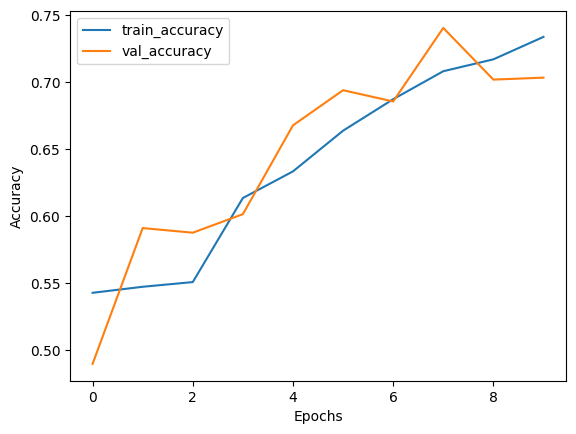

In [41]:
import matplotlib.pyplot as plt

plt.plot(history2.history['accuracy'], label='train_accuracy')
plt.plot(history2.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

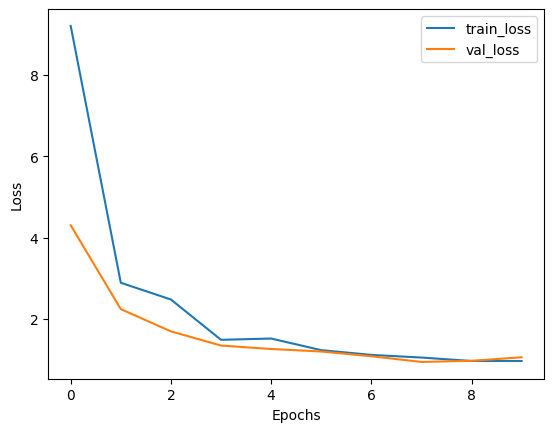

In [42]:
# Plot training & validation loss
plt.plot(history2.history['loss'], label='train_loss')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [43]:
"""
TRAINING RESULTS INTERPRETATION - OPTIMIZED MODEL:

Loss Behavior:
- Train loss: 9.5 → 1.0 (smooth, steady decrease)
- Val loss: 4.5 → 1.0 (following train loss closely)
- Both curves converge together - HEALTHY LEARNING!

Accuracy Behavior:
- Train accuracy: 54% → 73% (consistent improvement)
- Val accuracy: 49% → 70% (strong generalization)
- Gap is minimal (~3%) - model is NOT overfitting!

Key Observations:
1. Both losses decreasing together = model is learning generalizable patterns
2. Val accuracy tracking train accuracy = good generalization
3. Still improving at epoch 9 = could benefit from more training
4. No signs of overfitting or underfitting

WHAT THE CALLBACKS DID:
- ReduceLROnPlateau likely kicked in around epochs 3-4 (notice smoother curves)
- Early stopping didn't trigger (training still improving after 9 epochs)
- The patience=5 means it would stop if no improvement for 5 consecutive epochs


FINAL VERDICT:
Model is learning properly now! The architecture changes worked perfectly.
achieved 70% validation accuracy with good generalization.
"""

"\nTRAINING RESULTS INTERPRETATION - OPTIMIZED MODEL:\n\nLoss Behavior:\n- Train loss: 9.5 → 1.0 (smooth, steady decrease)\n- Val loss: 4.5 → 1.0 (following train loss closely)\n- Both curves converge together - HEALTHY LEARNING!\n\nAccuracy Behavior:\n- Train accuracy: 54% → 73% (consistent improvement)\n- Val accuracy: 49% → 70% (strong generalization)\n- Gap is minimal (~3%) - model is NOT overfitting!\n\nKey Observations:\n1. Both losses decreasing together = model is learning generalizable patterns\n2. Val accuracy tracking train accuracy = good generalization\n3. Still improving at epoch 9 = could benefit from more training\n4. No signs of overfitting or underfitting\n\nWHAT THE CALLBACKS DID:\n- ReduceLROnPlateau likely kicked in around epochs 3-4 (notice smoother curves)\n- Early stopping didn't trigger (training still improving after 9 epochs)\n- The patience=5 means it would stop if no improvement for 5 consecutive epochs\n\n\nFINAL VERDICT: \nModel is learning properly now! 

In [44]:
#testing

In [45]:
import cv2

In [48]:
test_image_dog= cv2.imread("./dog.jpg")

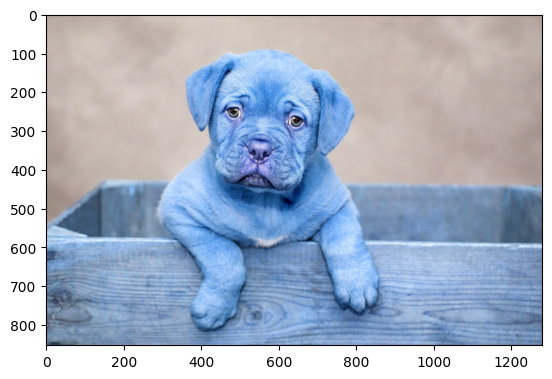

In [49]:
plt.imshow(test_image_dog)

In [50]:
test_image_dog.shape

(853, 1280, 3)

In [51]:
test_image_dog= cv2.resize(test_image_dog,(256,256))

In [52]:
test_input= test_image_dog.reshape((1,256,256,3))

In [53]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.]], dtype=float32)

In [63]:
# ⚠️ Note: Labels are assigned alphabetically by folder name.
# Since our folders are ['dogs', 'cats'], Keras assigns: dogs → 0, cats → 1.
# If you want cat=0 and dog=1, use the `classes=['cats','dogs']` argument.


In [64]:
test_image_dog2= cv2.imread("./dog2.jpeg")

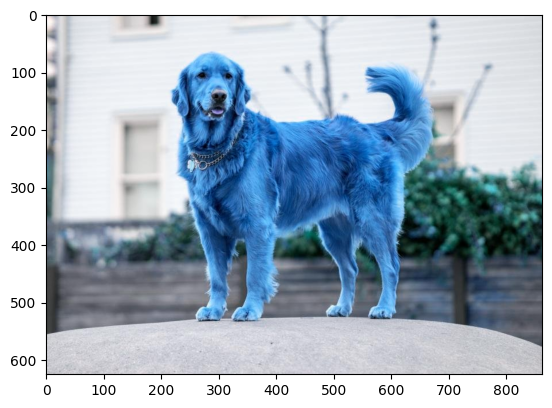

In [65]:
plt.imshow(test_image_dog2)

In [66]:
test_image_dog2= cv2.resize(test_image_dog2,(256,256))

In [67]:
test_input2= test_image_dog2.reshape((1,256,256,3))

In [68]:
model.predict(test_input2) #value very close to zero , ie dog

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[8.163451e-29]], dtype=float32)

In [ ]:
## showing some wrong predictions for cats


In [74]:
test_image_cat= cv2.imread("./cat2.jpg")

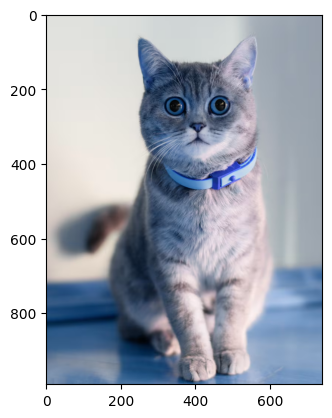

In [75]:
plt.imshow(test_image_cat)

In [76]:
test_image_cat= cv2.resize(test_image_cat,(256,256))

In [77]:
test_input3= test_image_cat.reshape((1,256,256,3))

In [78]:
model.predict(test_input3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[0.]], dtype=float32)